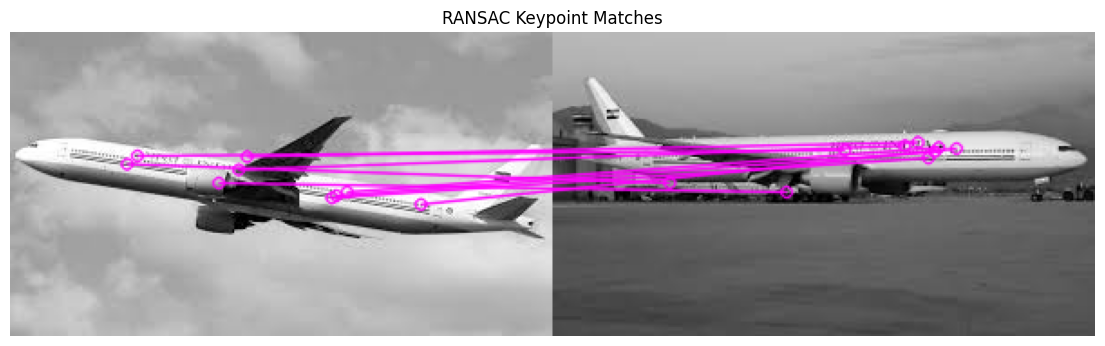

In [8]:
# Cell 1: Import libraries and set up plotting
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Load images, match keypoints, and apply RANSAC
img1 = cv2.imread('aero1.jpeg', 0)  # Grayscale
img2 = cv2.imread('aero2.jpeg', 0)

# Check if images loaded
if img1 is None or img2 is None:
    print("Error: Could not load one or both images")
else:
    # Detect and match keypoints with ORB
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Get matched points
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

    # Apply RANSAC
    H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 2.0)

    # Draw inlier matches
    matches_mask = mask.ravel().tolist()
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, 
                                  matchColor=(255, 0, 255), matchesMask=matches_mask, flags=2)

    # Display
    plt.figure(figsize=(14, 8))
    plt.imshow(img_matches, cmap='gray')
    plt.title('RANSAC Keypoint Matches')
    plt.axis('off')
    plt.show()